# Simple Linear Regression (SLR)

This notebook serves as an introduction to regression tasks focusing on simple linear regression (slr). We will:

 1. Discuss what SLR is,
 2. Implement SLR to __Predict Baseball Team Wins from Run Differential__

Let's begin!

For this notebook, we need the following libraries:

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background (for readability of visualizations)
sns.set_style("whitegrid")

## Regression Modeling

Regression is a statistical method used for modeling the relationship between a dependent variable $y$ (numeric type) and one or more independent variables $X$. The goal is to understand and predict the dependent variable $y$ based on the values of the independent variables $X$. Typically, we describe the relationship as a function between the two:

$$y = f(X) + \epsilon,$$

where $\epsilon$ represents the error. This relationship is called __the model__. It is common to say that we are regressing $y$ on $X$.



Let's take a look at a visualization:


In [2]:
## make some data
## x is evenly spaced from (-5,5)
x = np.linspace(-5,5,100)

## y is f(x) + random noise
y = 1/(1+np.exp(-x)) +  .08*np.random.randn(100)

You can ignore the code in the next cell, I'm just making some illustrative plots

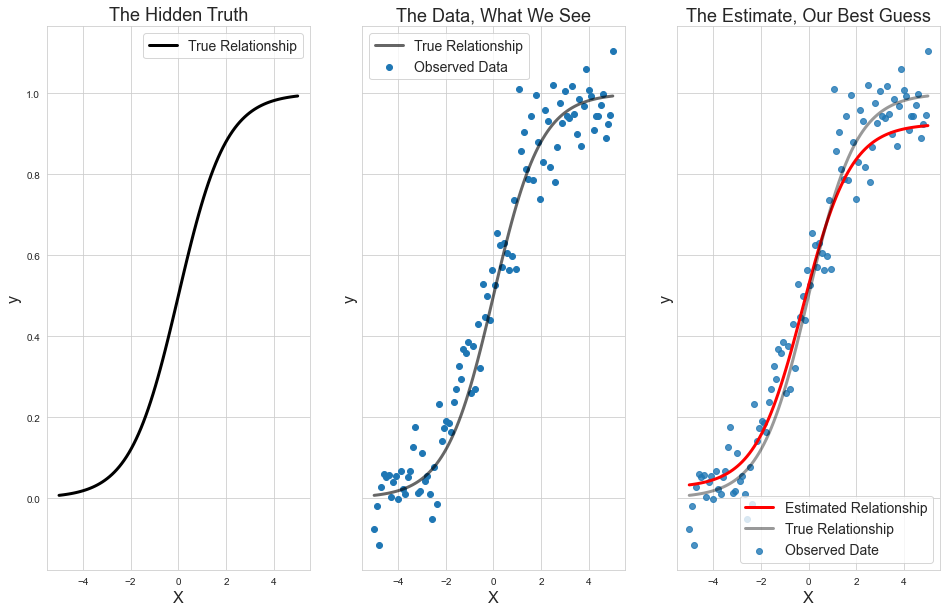

In [3]:
## plot the data
## make the figure
fig,ax = plt.subplots(1,3,figsize = (16,10),sharey=True)

## plot the truth
ax[0].plot(x,1/(1+np.exp(-x)),linewidth=3,c='k',alpha=1,label="True Relationship")

## plot the data and the truth in the middle
ax[1].plot(x,1/(1+np.exp(-x)),linewidth=3,c='k',alpha=.6,label="True Relationship")
ax[1].scatter(x,y,label = "Observed Data")

## plot a sample estimate function on right
ax[2].plot(x,.9/(1+.8*np.exp(-x))+.025,linewidth = 3,c='r',label="Estimated Relationship")
ax[2].plot(x,1/(1+np.exp(-x)),linewidth=3,c='k',alpha=.4,label="True Relationship")
ax[2].scatter(x,y,alpha=.8,label = "Observed Date")

## Set titles and label
ax[0].set_title("The Hidden Truth",fontsize=18)
ax[0].set_xlabel("X",fontsize=16)
ax[0].set_ylabel("y",fontsize=16)

ax[1].set_title("The Data, What We See",fontsize=18)
ax[1].set_xlabel("X",fontsize=16)
ax[1].set_ylabel("y",fontsize=16)

ax[2].set_title("The Estimate, Our Best Guess",fontsize=18)
ax[2].set_xlabel("X",fontsize=16)
ax[2].set_ylabel("y",fontsize=16)

## Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

## Simple Linear Regression (SLR):


SLR is a regresson task that assumes the true relationship between the $X$, $y$ is linear:

$$
Y = \beta_0 + \beta_1X + \varepsilon  \quad (*)
$$

Where:  $\varepsilon$ represents the error term or residuals, which accounts for the difference between the observed and predicted values of $Y$. 

For example, in the following plot, we have some points $(x_i, y_i)$ and you can see a strong linear pattern in the data.

In [4]:
# Generate data
x = np.linspace(-5, 5, 50)
y = 2 * x + 3 + 2 * np.random.randn(50)  # Linear relationship with added random noise

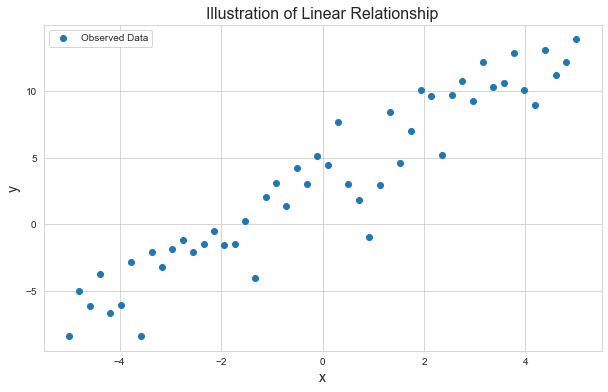

In [5]:
# Plotting

# This creates a figure with a size of 10 units by 6 units
plt.figure(figsize=(10, 6))

# Plots the observed data using plt.scatter
plt.scatter(x, y, label="Observed Data")

# Adds labels to the x and y axes for better readability
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)

# Adds a title to the plot
plt.title("Illustration of Linear Relationship", fontsize=16)

# Creates a legend based on the labels provided
plt.legend()

plt.show()


This linear relationship can be modeled as $Y = \beta_0 + \beta_1X$ 

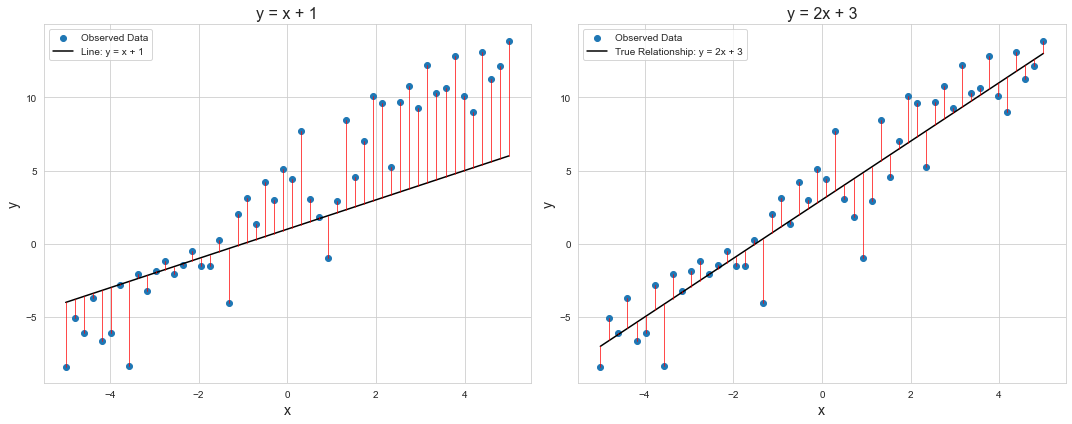

In [6]:
# Plotting
plt.figure(figsize=(15, 6))

# First subplot: Line: y = x + 1
plt.subplot(1, 2, 1)
plt.scatter(x, y, label="Observed Data")
plt.plot(x, x + 1, color='black', linestyle='-', label="Line: y = x + 1")
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], x[i] + 1], color='red', linestyle='-', linewidth=0.7)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("y = x + 1", fontsize=16)
plt.legend()
plt.grid(True)

# Second subplot: True Relationship: y = 2x + 3
plt.subplot(1, 2, 2)
plt.scatter(x, y, label="Observed Data")
plt.plot(x, 2*x + 3, color='black', linestyle='-', label="True Relationship: y = 2x + 3")
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], 2*x[i] + 3], color='red', linestyle='-', linewidth=0.7)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("y = 2x + 3", fontsize=16)
plt.legend()
plt.grid(True)



plt.tight_layout()
plt.show()



Intuitively, we want to choose a line that is collectively closer to data. In other words, we aim to choose $\hat{\beta_0}$ and $\hat{\beta_1}$ so that $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} X_i$ collectively approximate $y_i$ as closely as possible. 

A common way to measure collective closeness is the <i> Root Mean Squared Error (RMSE)</i>, which is essentially the average of the
squared differences between observed data and the model (red vertical lines):

$$
RMSE = \bigg( \frac{1}{n}\sum_{i=1}^n(y_i - (\hat{\beta_0} +\hat{\beta_1}x))^2\bigg)^{\frac{1}{2}}$$


### How do we minimize the RMSE?

We are looking for values $\beta_0$ and $\beta_1$ that minimizes RMSE. Equivalently,and for simplicity, we can consider minimizing $(RMSE)^2:$

$$
MSE = \frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2.
$$


By doing some calculus we have:


$$
\hat{\beta_1} = \frac{\sum_{i=1}^n\left(X_i - \overline{X}\right)\left(y_i - \overline{y}\right)}{\sum_{i=1}^n\left(X_i - \overline{X}\right)^2} = \frac{\text{cov}(X,y)}{\sigma^2_{X}},
$$

and

$$
\hat{\beta_0} = \overline{y} - \hat{\beta_1}\overline{X}.
$$

Then we can use $y = \hat{\beta_0} + \hat{\beta_1} X$ to predict the future value of $y$.


#### 1. There exists a linear relationship between  𝑦  and  𝑋.

We can check this by making a plot

Or computing __the Pearson Correlation__, $\rho$.

$\rho$ is a statistical measure of the _strength of the linear relationship_ between $y$ and $X$. Here's the formula:
$$
\rho = \frac{Cov(y,X)}{\sigma_X \sigma_y}
$$

The Pearson Correlation is bounded between $-1$ and $1$ 


1. A Pearson correlation coefficient close to -1 indicates a strong negative linear relationship.
2. A Pearson correlation coefficient close to 0 indicates no linear relationship.
3. A Pearson correlation coefficient close to 1 indicates a strong positive linear relationship.



We can approximate $\rho$ with the sample covariance and sample standard deviations, the approximation is $r$.
        

#### 2 - All Observations are Independent:

How to check?

1. Think about how data is collected and find variables of concerns. 

2. Plot your residuals and check if there is an obvious relationship.

#### 3 - The Residuals are Normally Distributed 

Make a histogram of the residuals to check for a bell curve.

## Example

Can you predict a baseball team's win total if you know their run differential? 

The Major League Baseball (MLB) season schedule generally consists of __162 games__ for each of the 30 teams in the __American League (AL)__ and __National League (NL)__. A __run (R)__ is considered $1$ point in baseball and __run differential (RD)__ is the difference between the number of runs a team scores and the number of runs it gave up.

__Steps:__
1. Exploring the dataset and preprocessing
2. Modeling and fitting 
3. Prediction and Model Performance

### Exploring your data

In [27]:
# Use pandas to import the data
# it is stored in the baseball_run_diff.csv file
import pandas as pd

baseball = pd.read_csv("baseball_run_diff.csv")

# Look at 5 randomly sampled rows
baseball.sample(5)

In [28]:
# This will tell us about the df
baseball.info()

We can see that there are some missing information (# of non-null is inconsistent). To handel missing information, we can use 

`dropna()`

In [9]:
baseball_with_no_missing_info = baseball.dropna()

In [29]:
#baseball_with_no_missing_info.info()

### Train-Test Split

To check our predictive model's accuracy, we split our data into training and testing subsets. One reson for this is training data may overestimate a model's effectiveness, the test data serves as a sanity check, to see if the model's performance aligns with expectations.


Before exploring further, let's make a copy of our data.

In [30]:
## first make a copy of the original dataframe

baseball_copy = baseball_with_no_missing_info.copy()

Now, let's employ `pandas` for our train-test split.

In [31]:
## We use sample() to make a random sample
## frac: to set aside 25% for testing
## random_state=440 allows you to reproduce the same train test split each time you run the code.
baseball_train = baseball_copy.sample(frac = .75, random_state = 440)

## now use drop and the train index to make test
baseball_test = baseball_copy.drop(baseball_train.index)

### Checking for potential relationship between variables

Examine any potential relationship between wins (coded as W) and run differential (coded as RD).


In [34]:
plt.figure(figsize = (8,8))

## plt.scatter plots RD on the x and W on the y
plt.scatter(baseball_train.RD, baseball_train.W)

plt.xlabel("Run Differential", fontsize =16)
plt.ylabel("Wins", fontsize = 16)

plt.show()

### Model Building

#### Model Building using (*)

In [14]:
# Building SLR model using (*)

## We get the means here
X_bar = baseball_train.RD.mean()
y_bar = baseball_train.W.mean()


## We get the covariance and variance
cov = baseball_train[['RD','W']].cov().iloc[0,1]
var = baseball_train.RD.var()

## Here we calculate beta_1_hat
beta_1_hat = cov/var

## Here we calculate beta_0_hat
beta_0_hat = y_bar - beta_1_hat*X_bar


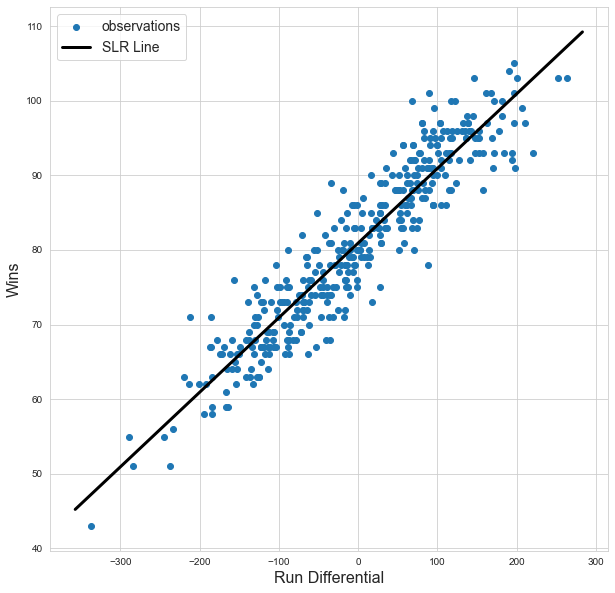

In [15]:
## We can produce a plot with the fitted line here

## Use the x as the input for your line, i.e. beta_0_hat + beta_1_hat*x
min_rd = baseball_train.RD.min()
max_rd = baseball_train.RD.max()
padding = 20
x = np.linspace(min_rd - padding,max_rd + padding,1000)

plt.figure(figsize = (10,10))

# plt.scatter plots RD on the x and W on the y
plt.scatter(baseball_train.RD, baseball_train.W, label = "observations")

# Now add mean prediction line
plt.plot(np.linspace(min_rd - padding,max_rd + padding,1000),
            beta_0_hat + beta_1_hat*np.linspace(min_rd - padding,max_rd + padding,1000), 'k',
            label="SLR Line",
            linewidth = 3)

# Always good practice to label well when
# presenting a figure to others
# place an xlabel
plt.xlabel("Run Differential", fontsize =16)

# place a ylabel
plt.ylabel("Wins", fontsize = 16)

# Add a legend
plt.legend(fontsize=14)

# type this to show the plot
plt.show()

#### Model Building `sklearn`
`sklearn` is the open source python machine learning library. 

__Steps:__

1. import the model from sklearn, 
2. make a model object,
3. fit the object,
4. predict. 

In [35]:
# First we import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [36]:
## Now we make a LinearRegression object
slr = LinearRegression(copy_X = True)

The parameter `copy_X` is set to `True`. This makes a copy of the original input $X$ to ensure that it is not modified during the fitting process.

To learn more about the `LinearRegression` object read the documentation here: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</a>.

In [37]:
## Now we fit the model
slr.fit(baseball_train['RD'].values.reshape(-1,1), baseball_train['W'].values)


Note that the first parameter is the input variable `RD` and the next parameter is the output variable `W`. Moreover, if the input is a 1-D vector you need to reshape it.

Let's print the coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$

In [39]:
## Print the coefficients
beta_1_hat = slr.coef_[0]
beta_0_hat = slr.intercept_

print("beta_1_hat is", beta_1_hat)
print("beta_0_hat is", beta_0_hat)

We can produce a scatter plot of data points along with the fitted SLR line ($y = \beta_0 + \beta_1 x $)

In [40]:
# Define padding for extending x-axis range
padding = 20

# Generate 1000 evenly spaced x values for plotting, extending the range of RD
x = np.linspace(baseball_train.RD.min() - padding, baseball_train.RD.max() + padding, 1000)

# Create the scatter plot along with the SLR line
plt.figure(figsize=(10, 10))  # Set figure size
plt.scatter(baseball_train.RD, baseball_train.W, label="Observations")  # Plot the observations
plt.plot(x, beta_0_hat + beta_1_hat * x, 'k', label="SLR Line", linewidth=3)  # Plot the SLR line
plt.xlabel("Run Differential", fontsize=16)  # Set x-axis label
plt.ylabel("Wins", fontsize=16)  # Set y-axis label
plt.legend(fontsize=14)  # Add legend
plt.show()  # Display the plot


### Model Performance:

We understand a model by looking at its predictions. 

In [ ]:
## Here we calculate the MSE on the training data
## (how well the model performs on seen data)
from sklearn.metrics import mean_squared_error

#actual y values
y_train = baseball_train.W.values 
# prediction on training dataset 
y_train_pred = slr.predict(baseball_train.RD.values.reshape(-1,1)) 

#Computing MSE
mse = mean_squared_error(y_train, y_train_pred)
print("The training MSE is", mse)

In [41]:
#You code

## Here we calculate the MSE on the testing data
## (how well the model generalizes to unseen data)


A large gap between the training and testing MSE indicates high variance (__overfitting__), while a small gap may suggest high bias (__underfitting__). 

Do you see any overfitting or underfitting?

#### How to interpret MSE?



Since MSE is the average of squared errors, an MSE of 17.827 suggests that the model's predictions are, on average, off by approximately $\sqrt{17.827} \simeq 4.22$. The interpretation of MSE also depends on what is considered acceptable. For example, if predicting within a range of ±5 wins is considered acceptable, an MSE of 17.827 may be acceptable.

### Residuals
Let's look at error again. The predictions tells you the pattern that the model has captured, and the residuals tell you what the model has missed. We can look at the residuals, to verify that we’ve successfully removed the strong linear pattern:

In [ ]:
## Residuals are actual values minus estimated values
res =  baseball_train.W.values - (beta_0_hat + beta_1_hat * baseball_train.RD.values)


## rd vs residual

plt.figure(figsize = (12,12))

plt.scatter(baseball_train.RD,res)

plt.xlabel("Run Differential", fontsize = 16)
plt.ylabel("Residual", fontsize = 16)

plt.show()

#### How to interpret residuals?

A residual of -5 indicates that the actual number of wins for a team was 5 unit lower than what was predicted by the model based solely on their run differential. For example, if the model predicted that a team should have won 90 games based on their run differential, but they actually only won 85 games, then the residual would be -5. This suggests that the team __underperformed__ relative to what would be expected based on their run differential. Conversely, a positive residual would indicate that the team __outperformed__ expectations.


### Further Reading: 

Stastical Assumptions Behind SLR 

Simple Linear Regression (SLR) relies on several key statistical assumptions:

1. **Linearity**: The relationship between the independent variable (X) and the dependent variable (Y) is linear. This means that a straight line can adequately represent the relationship between X and Y.

2. **Independence of Errors**: The errors (residuals) in the model are independent. In other words, the error term for one observation should not be related to the error term for another observation. Independence ensures that each observation provides new information and that there is no systematic pattern in the residuals.

3. **Homoscedasticity**: The variance of the errors (residuals) is constant across all levels of the independent variable. This means that the spread of the residuals should be roughly consistent as the values of the independent variable change. This assumption is often checked by plotting residuals against predicted values.

4. **Normality of Errors**: The errors (residuals) are normally distributed. This assumption implies that the distribution of the residuals follows a normal distribution with a mean of zero. While this assumption is not required for large sample sizes due to the Central Limit Theorem, it is still important for smaller sample sizes to ensure the validity of statistical tests and confidence intervals.

5. **No Perfect Multicollinearity**: In the case of multiple independent variables, there should be no perfect linear relationship between them. Multicollinearity can lead to unstable estimates of the regression coefficients.

These assumptions are important to ensure that the estimates obtained from the regression model are valid and reliable. Violations of these assumptions can lead to biased estimates and incorrect inferences. It's crucial to check these assumptions before interpreting the results of a simple linear regression analysis.


#### Is the true relationship between variables linear?
We already checked that by ploting RD against W  

#### Are the observations independent?

The data is produced from year after year observations of the same teams. It's possible that there is time dependence or team dependence. To check that we can plot our residuals against our variables of concern. Then you examine the plots to see if there is an obvious relationship.

In [24]:
#You code
## make a scatter plot (year vs residual)

In [25]:
#You code
## make a scatter plot (team vs residual)

#### Are the residuals normally distributed (Mean 0 and Equal Variance)?
We can make a histogram of the residuals to check for a bell curve.

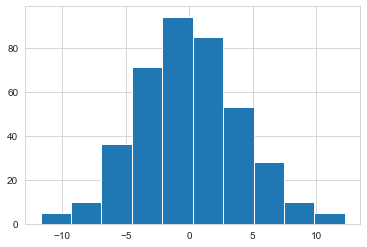

In [26]:
# plot a histogram of the residuals here
plt.hist(res)

plt.show()

#### How to Check Homoscedasticity ?

Homoscedasticity refers to the assumption that the variance of the residuals is constant across all levels of the independent variables.

Plotting the predicted values versus the residuals is a common method to visually assess homoscedasticity. In an ideal scenario, the points on this plot should be randomly scattered around the horizontal line at 0, without forming any discernible pattern, funnel shape, or any systematic increase or decrease in spread as the predicted values change.

### Refrences:
        
1.[R for Data Science](https://r4ds.had.co.nz/index.html)

2.[Erdös Institue Data Science BootCamp](https://www.erdosinstitute.org/)

3.https://www.baseball-reference.com/
            